In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [3]:
df = pd.read_csv('Steel_industry_data.csv')

*Мощность 2 7 и 3 у трех категориальных признаков (WeekStatus, Day_of_week и Load_type), замаппим на числа*

In [4]:
df.max()

date                                    31/12/2018 23:45
Usage_kWh                                         157.18
Lagging_Current_Reactive.Power_kVarh               96.91
Leading_Current_Reactive_Power_kVarh               27.76
CO2(tCO2)                                           0.07
Lagging_Current_Power_Factor                       100.0
Leading_Current_Power_Factor                       100.0
NSM                                                85500
WeekStatus                                       Weekend
Day_of_week                                    Wednesday
Load_Type                                    Medium_Load
dtype: object

In [5]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if column_name == 'WeekStatus' or column_name == 'Day_of_week' or column_name == 'Load_Type':
        df[column_name] = le.fit_transform(df[column_name])

/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/va

In [6]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = df.iloc[:, 0:2]

# GRU Implementation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
24510,13/09/2018 07:45,5.26,0.00,0.00,56.48,100.00,27900,0,4,0
11355,29/04/2018 07:00,3.74,0.00,0.00,57.52,100.00,25200,1,3,0
32539,05/12/2018 23:00,4.21,0.00,0.00,68.88,100.00,82800,0,6,1
18663,14/07/2018 10:00,1.66,0.29,0.02,99.91,100.00,36000,1,2,2
33094,11/12/2018 17:45,0.00,3.89,0.01,100.00,99.27,63900,0,5,1
...,...,...,...,...,...,...,...,...,...,...
16850,25/06/2018 12:45,0.00,25.27,0.00,100.00,22.22,45900,0,1,2
6265,07/03/2018 06:30,4.57,0.00,0.00,63.03,100.00,23400,0,6,0
11284,28/04/2018 13:15,0.14,14.33,0.01,99.99,68.76,47700,1,2,1
860,09/01/2018 23:15,4.32,0.00,0.00,73.19,100.00,83700,0,5,0


In [9]:
#Отсортируемся по времени
X_train = X_train.sort_values(by='date')
X_test = X_test.sort_values(by='date')
y_train = y_train.sort_values(by='date')
y_test = y_test.sort_values(by='date')
#Избавимся от времени
X_train = X_train.loc[:, X_train.columns != 'date']
X_test = X_test.loc[:, X_test.columns != 'date']
y_train = y_train.loc[:, y_train.columns != 'date']
y_test = y_test.loc[:, y_test.columns != 'date']

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Создание объекта MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-netw

In [74]:
rng = np.random.default_rng(51)


def tanh(x):
    return np.tanh(x)


def dtanh(x):
    return 1 - np.square(tanh(x))

def sig(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def mse(y_pred, y, batch_size):
     n = y_pred.shape[0]
     squared_batched = []
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         squared_batched.append(0.5 * np.sum(np.square(batch_y_pred - batch_y)))
     err = np.mean(squared_batched)
     return err

def r2(y_pred, y, batch_size):
     n = y_pred.shape[0]
     chisl = 0
     znamen = np.sum((y - np.mean(y))**2) 
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         chisl += np.sum((batch_y - batch_y_pred)**2) 
         
     return 1 - chisl/znamen


def dmse(y_pred, y):
    n = y.shape[0]
    return (2 / n) * (y_pred - y)

In [45]:
class GRU:
    def __init__(self, features_count,  lstm_blocks_count, output_count, batch_size, learning_rate):
        
        self.batch_size = batch_size
        self.lstm_blocks_count = lstm_blocks_count
        self.features_count = features_count
        self.output_count = output_count
        self.lr = learning_rate
        
        #reset gate        
        Wr = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        br = self._gen_bias(lstm_blocks_count)
        #update gate
        Wz = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bz = self._gen_bias(lstm_blocks_count)
        #candidate hidden state
        Wh = self._gen_weights(features_count + lstm_blocks_count, lstm_blocks_count)
        bh = self._gen_bias(lstm_blocks_count)
        #output
        Wy = self._gen_weights(lstm_blocks_count, output_count)
        by = self._gen_bias(output_count)
        
        self.parameters = {"Wr": Wr, "Wz": Wz, "Wh": Wh, "Wy": Wy, "br": br, "bz": bz, "bh": bh, "by": by}
    
        self.y_pred = np.array([])
    
        # functions
        self.activation_fn = tanh
        self.activation_dfn = dtanh
        self.loss_fn = mse


    def _gen_weights(self, in_neurons, out_neurons):
        return rng.random((out_neurons, in_neurons)) * 2 - 1

    def _gen_bias(self, count):
        return rng.random((count, 1)) * 2 - 1

    def _compute_loss(self, X, y):
        y_pred = np.array(self.predict(X))
        y = np.array(y)
        y = y.reshape(y.shape[0])
        return self.loss_fn(y_pred, y, self.batch_size)


    def _cell_forward(self, xt, h_prev):
          # Retrieve parameters from "parameters"
        Wr = self.parameters["Wr"]
        br = self.parameters["br"]
        Wz = self.parameters["Wz"]
        bz = self.parameters["bz"]
        Wh = self.parameters["Wh"]
        bh = self.parameters["bh"]
        Wy = self.parameters["Wy"]
        by = self.parameters["by"]
        
        xt = xt.reshape(xt.shape[0], 1)
        # Retrieve dimensions from shapes of xt and Wy
        n_x = self.features_count
        n_y = self.output_count
        n_a = self.lstm_blocks_count
    
        # Concatenate a_prev and xt (≈3 lines)
        concat = np.zeros((n_a + n_x, 1))
        concat[: n_a] = h_prev
        concat[n_a :] = xt
        concat = concat.reshape(concat.shape[0], 1)
    
        # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4)
        rt = sig(np.dot(Wr, concat) + br)
        zt = sig(np.dot(Wz, concat) + bz)
        h_tilda = np.tanh(np.dot(Wh, np.concatenate((rt*h_prev, xt), axis=0)) + bh)
        h_next = zt * h_prev + (1-zt)* h_tilda
          
        
        # Compute prediction of the LSTM cell (≈1 line)
        yt_pred = self.activation_fn(np.dot(Wy, h_next) + by)

        # store values needed for backward propagation in cache
        cache = (h_next, h_prev, rt, zt, h_tilda, xt, yt_pred)
    
        return h_next, yt_pred, cache
    
    def _feedforward(self, batch_X):
        caches = []
        self.y_pred = np.array([])
        # Retrieve dimensions from shapes of x and Wy (≈2 lines)
        n_x = self.features_count
        T_x = self.batch_size
        n_y = self.output_count
        n_a = self.lstm_blocks_count
        
        # initialize "a", "c" and "y" with zeros (≈3 lines)
        h = np.zeros((T_x, n_a))
        y = np.zeros((T_x, n_y))
        
        # Initialize a_next and c_next (≈2 lines)
        h_next = np.zeros((n_a, 1))
        
        # loop over all time-steps
        for t in range(T_x):
            # Update next hidden state, next memory state, compute the prediction, get the cache (≈1 line)
            h_next, yt, cache = self._cell_forward(batch_X[t, :],h_next)
            # Save the value of the new "next" hidden state in a 
            h[t, :] = h_next.reshape(h_next.shape[0])
            # Save the value of the prediction in y 
            y[t, :] = yt.reshape(yt.shape[0])
            # Append the cache into caches 
            caches.append(cache)
        # store values needed for backward propagation in cache
        self.caches = (caches, batch_X)
        self.y_pred = np.append(self.y_pred, y) 


    def _cell_backprop(self, yt_true, cache):
         # Retrieve information from "cache"
        (h_next, h_prev, rt, zt, h_tilda, xt, yt_pred) = cache
        
        # Retrieve dimensions from xt's and a_next's shape (≈2 lines)
        n_x = self.features_count
        n_a = self.lstm_blocks_count
         
        Wr = self.parameters["Wr"]
        Wz = self.parameters["Wz"]
        Wh = self.parameters["Wh"]
        Wy = self.parameters["Wy"]
         
        dy = yt_pred - yt_true
        dh = np.dot(Wy.T, dy)
        dh_tilda = dh * (1-zt)
        dzt = dh * (h_prev - h_tilda)
        drt = np.dot(Wh[:, :n_a].T, dh_tilda) * h_tilda
         
        dWr = np.dot(drt * rt * (1-rt), np.concatenate((h_prev, xt), axis=0).T)
        dWz = np.dot(dzt * zt * (1-zt), np.concatenate((h_prev, xt), axis=0).T)
        dWh = np.dot(
            dh_tilda * (1-h_tilda**2), np.concatenate((rt* h_prev, xt), axis=0).T
        )
        dWy = np.dot(dy, h_next.T)
        
        dbr = drt * rt * (1-rt)
        dbz = dzt * zt * (1-zt)
        dbh = dh_tilda * (1-h_tilda**2)
        dby = dy
         
        # Save gradients in dictionary
        gradients = {"dWr": dWr,"dbr": dbr, "dWz": dWz,"dbz": dbz,
                    "dWh": dWh,"dbh": dbh, "dWy": dWy,"dby": dby}
    
        return gradients

    def _backprop(self, y_true):
        # Retrieve values from the first cache (t=1) of caches.
        (caches, x) = self.caches
        
        # Retrieve dimensions from da's and x1's shapes (≈2 lines)
        T_x = self.batch_size
        n_a = self.lstm_blocks_count
        n_y = self.output_count
        n_x = self.features_count
        
        # initialize the gradients with the right sizes (≈12 lines)

        dWr = np.zeros((n_a, n_a + n_x))
        dWz = np.zeros((n_a, n_a + n_x))
        dWh = np.zeros((n_a, n_a + n_x))
        dWy = np.zeros((n_y, n_a))
        dbr = np.zeros((n_a, 1))
        dbz = np.zeros((n_a, 1))
        dbh = np.zeros((n_a, 1))
        dby = np.zeros((n_y, 1))
        
        # loop back over the whole sequence
        for t in reversed(range(T_x)):
            # Compute all gradients using lstm_cell_backward
            gradients = self._cell_backprop(y_true[t],caches[t])
            # Store or add the gradient to the parameters' previous step's gradient
            dWr += gradients["dWr"]
            dWz += gradients["dWz"]
            dWh += gradients["dWh"]
            dWy += gradients["dWy"]
            dbr += gradients["dbr"]
            dbz += gradients["dbz"]
            dbh += gradients["dbh"]
            dby += gradients["dby"]
        # Set the first activation's gradient to the backpropagated gradient da_prev.
        
        # Store the gradients in a python dictionary
        self.gradients = {"dWr": dWr,"dbr": dbr, "dWz": dWz,"dbz": dbz,
                    "dWh": dWh,"dbh": dbh, "dWy": dWy,"dby": dby}
        
    def _update_params(self):
        Wr = self.parameters["Wr"] - self.lr * self.gradients["dWr"]
        br = self.parameters["br"] - self.lr * self.gradients["dbr"]
        Wz = self.parameters["Wz"] - self.lr * self.gradients["dWz"]
        bz = self.parameters["bz"] - self.lr * self.gradients["dbz"]
        Wh = self.parameters["Wh"] - self.lr * self.gradients["dWh"]
        bh = self.parameters["bh"] - self.lr * self.gradients["dbh"]
        Wy = self.parameters["Wy"] - self.lr * self.gradients["dWy"]
        by = self.parameters["by"] - self.lr * self.gradients["dby"]
        
        self.parameters = {"Wr": Wr, "Wz": Wz, "Wh": Wh, "Wy": Wy, "br": br, "bz": bz, "bh": bh, "by": by}

    def train(self, X, y, max_epochs=1000, min_loss = 0.1):
        #даем на обучение по одному примерчику
        n = y.shape[0]
        epoch_losses = np.array([])
        y_pred = np.array([])
        y_true = np.array([])
        y_pred_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        y_true_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        batch_size = self.batch_size

        flag = 0

        for i in range(max_epochs):
            #даем на обучение по batch_size примерчиков
            count = 0
            for j in range(0, n , batch_size):
                batch_X = X.iloc[j:j + batch_size].values
                batch_Y = y.iloc[j:j + batch_size].values
                self._feedforward(batch_X)
                self._backprop(batch_Y)
                self._update_params()
            epoch_losses = np.append(epoch_losses, self._compute_loss(X, y))
            print(f"Epoch {i}, epoch loss = {epoch_losses[i]}")
            if epoch_losses[i] < min_loss:
                flag = 1
            if flag == 1:
                break
        return epoch_losses

    def predict(self, X):
        batch_size = self.batch_size
        n = X.shape[0]
        y_pred = []
        for k in range(0, n , batch_size):
            self._feedforward(X.iloc[k:k + batch_size].values)
            y_pred.extend(self.y_pred)
        return y_pred


Epoch 0, epoch loss = 1.2943234881784866
Epoch 1, epoch loss = 0.6347334470880334
Epoch 2, epoch loss = 1.1944254618711574
Epoch 3, epoch loss = 0.2612809711876173
Epoch 4, epoch loss = 0.43611022117803944
Epoch 5, epoch loss = 0.4460202127502373
Epoch 6, epoch loss = 0.4008557103060447
Epoch 7, epoch loss = 0.6134555657857343
Epoch 8, epoch loss = 1.0874040669113334
Epoch 9, epoch loss = 0.805129543053181
Epoch 10, epoch loss = 0.3644246530934722
Epoch 11, epoch loss = 0.4894895755818016
Epoch 12, epoch loss = 0.5053851091299135
Epoch 13, epoch loss = 0.3917598398331669
Epoch 14, epoch loss = 0.3756650792258997
Epoch 15, epoch loss = 0.18473156750590805
First epoch loss - 1.2943234881784866
Last epoch loss - 0.18473156750590805


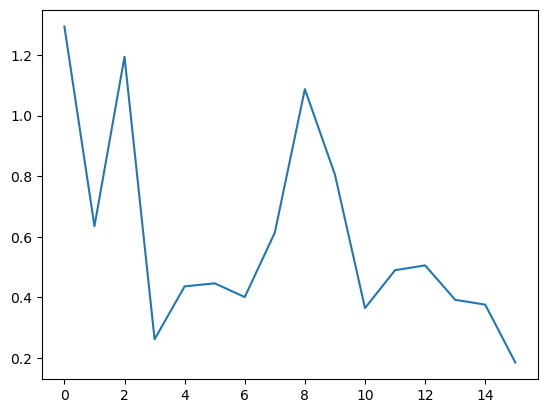

In [46]:
nn =  GRU(9, 30, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.1, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.5999525447577334
Epoch 1, epoch loss = 1.6337172964226783
Epoch 2, epoch loss = 0.20994433584632713
Epoch 3, epoch loss = 0.30259766363291685
Epoch 4, epoch loss = 0.20407716071783508
Epoch 5, epoch loss = 0.13878996461621612
Epoch 6, epoch loss = 0.34395050991664605
Epoch 7, epoch loss = 0.589262757783665
Epoch 8, epoch loss = 0.3169264900735775
Epoch 9, epoch loss = 0.19070711666167572
Epoch 10, epoch loss = 0.27922119738022577
Epoch 11, epoch loss = 0.09457447875754232
First epoch loss - 0.5999525447577334
Last epoch loss - 0.09457447875754232


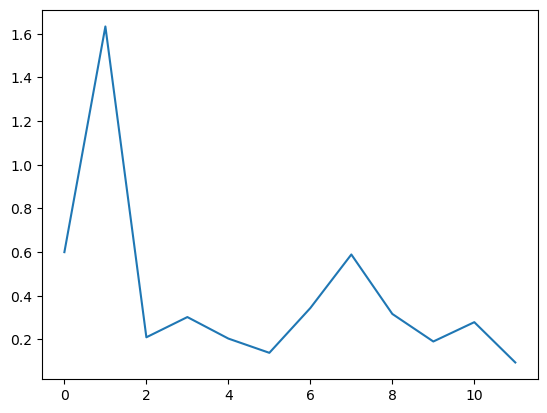

In [47]:
nn =  GRU(9, 30, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.1, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.32135617989925175
Epoch 1, epoch loss = 0.5884024201791909
Epoch 2, epoch loss = 1.0590530638995035
Epoch 3, epoch loss = 0.12289450178471457
Epoch 4, epoch loss = 0.12324604868345733
Epoch 5, epoch loss = 0.11879132475435976
Epoch 6, epoch loss = 0.07355437088550379
Epoch 7, epoch loss = 0.07014440218589865
Epoch 8, epoch loss = 0.1806748531341794
Epoch 9, epoch loss = 0.12624514618742477
Epoch 10, epoch loss = 0.10687736502733332
Epoch 11, epoch loss = 0.05268544696034347
Epoch 12, epoch loss = 0.5501485051247607
Epoch 13, epoch loss = 0.04580840739571005
First epoch loss - 0.32135617989925175
Last epoch loss - 0.04580840739571005


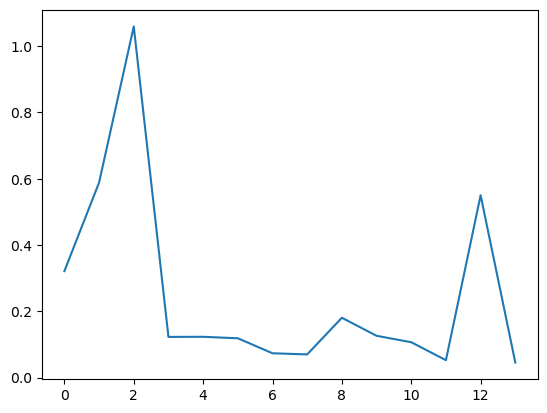

In [48]:
nn =  GRU(9, 30, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.05, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 1.270811657101508
Epoch 1, epoch loss = 0.43345408997722595
Epoch 2, epoch loss = 0.4771247968197337
Epoch 3, epoch loss = 0.20626657520594532
Epoch 4, epoch loss = 0.275073583707425
Epoch 5, epoch loss = 1.156885474468994
Epoch 6, epoch loss = 0.5650111195927793
Epoch 7, epoch loss = 0.14670752908770862
Epoch 8, epoch loss = 0.14515817262212616
Epoch 9, epoch loss = 1.2821865649232758
Epoch 10, epoch loss = 0.7473654688530582
Epoch 11, epoch loss = 0.185470060791972
Epoch 12, epoch loss = 0.2776597651800116
Epoch 13, epoch loss = 0.2285049142148203
Epoch 14, epoch loss = 0.1364417456096273
Epoch 15, epoch loss = 0.2842084610981329
Epoch 16, epoch loss = 0.13887134082989702
Epoch 17, epoch loss = 0.16813863747113403
Epoch 18, epoch loss = 0.16988099941101048
Epoch 19, epoch loss = 0.1866094911730487
Epoch 20, epoch loss = 0.4322553870644503
Epoch 21, epoch loss = 0.11774590310670174
Epoch 22, epoch loss = 0.41714169934449
Epoch 23, epoch loss = 0.09106405088362732

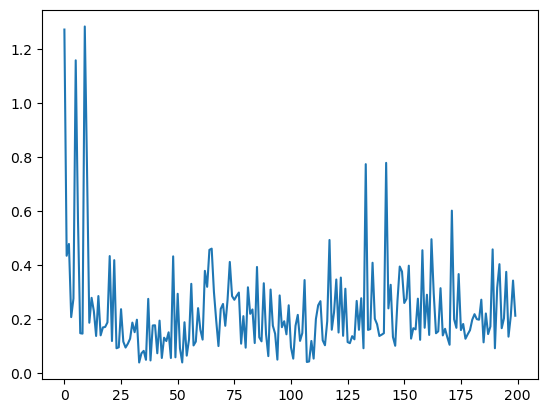

In [49]:
nn =  GRU(9, 30, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.01, max_epochs = 200)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.5318401275777442
Epoch 1, epoch loss = 0.21232123133088124
Epoch 2, epoch loss = 0.2863663902284808
Epoch 3, epoch loss = 0.18766726345195023
Epoch 4, epoch loss = 0.7211011358191588
Epoch 5, epoch loss = 0.47033404699447945
Epoch 6, epoch loss = 0.5433394544736312
Epoch 7, epoch loss = 0.13306083032530552
Epoch 8, epoch loss = 0.18330754778959701
Epoch 9, epoch loss = 0.17139542491430843
Epoch 10, epoch loss = 0.1787713809707264
Epoch 11, epoch loss = 0.3994674560978192
Epoch 12, epoch loss = 0.2173651458682696
Epoch 13, epoch loss = 0.16725093152470125
Epoch 14, epoch loss = 0.2116940874319614
Epoch 15, epoch loss = 0.19661976083849705
Epoch 16, epoch loss = 0.18672413726270026
Epoch 17, epoch loss = 0.1650047334492493
Epoch 18, epoch loss = 0.4580942946495968
Epoch 19, epoch loss = 0.3887002966695985
Epoch 20, epoch loss = 0.24195507310646122
Epoch 21, epoch loss = 0.19253253127589548
Epoch 22, epoch loss = 0.34373618438526005
Epoch 23, epoch loss = 0.7419860

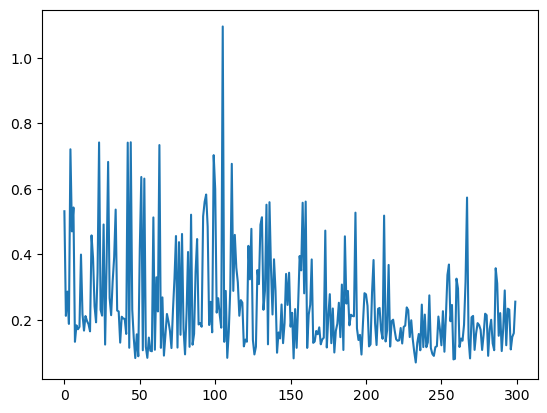

In [50]:
nn =  GRU(9, 50, 1, 8, learning_rate=0.3)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.01, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.05710980354941264
Epoch 1, epoch loss = 0.042646995581259506
Epoch 2, epoch loss = 0.03903902615835024
Epoch 3, epoch loss = 0.039493030757623844
Epoch 4, epoch loss = 0.03865119732783987
Epoch 5, epoch loss = 0.036106874832037616
Epoch 6, epoch loss = 0.03355696597832115
Epoch 7, epoch loss = 0.03153614445145282
Epoch 8, epoch loss = 0.029944240216742805
Epoch 9, epoch loss = 0.028561226579497556
Epoch 10, epoch loss = 0.02726956232450317
Epoch 11, epoch loss = 0.02604838281422694
Epoch 12, epoch loss = 0.024912669399897495
Epoch 13, epoch loss = 0.023878258750172375
Epoch 14, epoch loss = 0.02295243675903533
Epoch 15, epoch loss = 0.022134182816158473
Epoch 16, epoch loss = 0.021416072552688546
Epoch 17, epoch loss = 0.02078664776274693
Epoch 18, epoch loss = 0.020232308893990334
Epoch 19, epoch loss = 0.019739295767126557
Epoch 20, epoch loss = 0.019296054756788417
Epoch 21, epoch loss = 0.018894416760721733
Epoch 22, epoch loss = 0.018528932254364944
Epoch 2

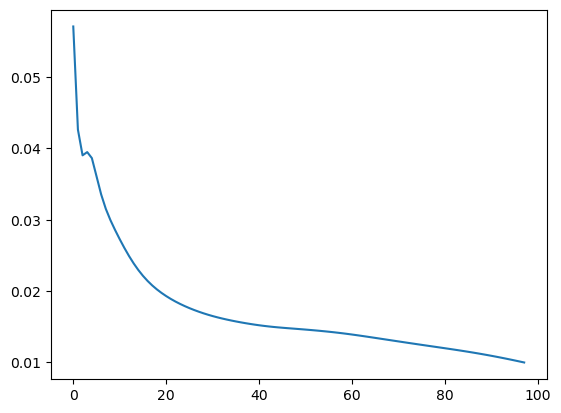

In [52]:
nn =  GRU(9, 50, 1, 8, learning_rate=0.01)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.01, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.1017036912194499
Epoch 1, epoch loss = 0.06712223035579966
Epoch 2, epoch loss = 0.04391264589996068
Epoch 3, epoch loss = 0.036076425659677634
Epoch 4, epoch loss = 0.032522375183291666
Epoch 5, epoch loss = 0.03056225413201066
Epoch 6, epoch loss = 0.029314939464764083
Epoch 7, epoch loss = 0.028059068085232616
Epoch 8, epoch loss = 0.026761404910131
Epoch 9, epoch loss = 0.025557882283698288
Epoch 10, epoch loss = 0.024475797398178508
Epoch 11, epoch loss = 0.02351627270644906
Epoch 12, epoch loss = 0.022683922660372478
Epoch 13, epoch loss = 0.02197702006464366
Epoch 14, epoch loss = 0.02137970091287432
Epoch 15, epoch loss = 0.020864375205907244
Epoch 16, epoch loss = 0.020402256677463277
Epoch 17, epoch loss = 0.019972773926467534
Epoch 18, epoch loss = 0.019564411834651525
Epoch 19, epoch loss = 0.0191708279388114
Epoch 20, epoch loss = 0.018788591939898146
Epoch 21, epoch loss = 0.018415070074862885
Epoch 22, epoch loss = 0.01804748711453721
Epoch 23, ep

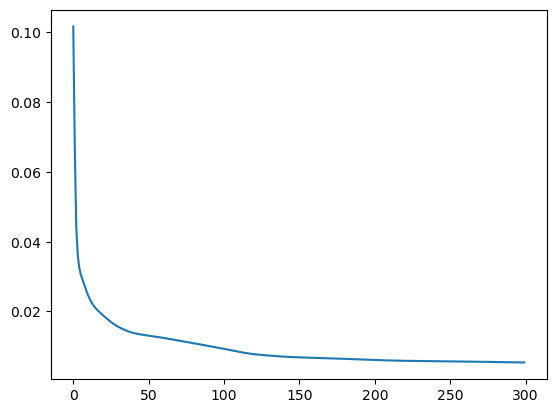

In [53]:
nn =  GRU(9, 50, 1, 8, learning_rate=0.01)
epoch_losses = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.005, max_epochs = 300)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [76]:
n = len(y_test)

observations = np.array(pd.DataFrame(y_test))  # фактические наблюдения
predictions = np.array(nn.predict(pd.DataFrame(X_test))) # предсказания (результат применения модели)

observations = observations.reshape(observations.shape[0])
mse_result = mse(predictions, observations, batch_size=4)
rmse_result = np.sqrt(mse_result)
r2_result = r2(predictions, observations, batch_size=4)
print(f'MSE: {mse_result}')
print(f'RMSE: {rmse_result}')
print(f'R^2: {r2_result}')



MSE: 0.026779747311605883
RMSE: 0.16364518725463906
R^2: 0.9322757543790394
